In [8]:
import pandas as pd # importing dependencies 
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt

In [9]:
load_dotenv(dotenv_path='info.env')

True

In [10]:
db_url = f"postgresql+psycopg2://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}:{os.getenv('DB_PORT')}/{os.getenv('DB_NAME')}"

In [11]:
engine = create_engine(db_url)

In [12]:
query = "SELECT * FROM orders"
orders_df = pd.read_sql(query, engine)
orders_df.head()

,order_id,order_date,customer_id,product_id,quantity,payment_id,region_id,discount,sales_amount,created_at
0,1001,2023-01-04,Bob,1002,17,3,4,0.21,2716.34,2025-04-09 22:38:00.549858
1,1002,2023-07-08,Alice,1042,23,1,4,0.15,5947.31,2025-04-09 22:38:00.549858
2,1003,2023-01-24,Bob,1054,22,3,4,0.11,6624.55,2025-04-09 22:38:00.549858
3,1004,2023-09-04,Eve,1068,14,2,4,0.03,3905.11,2025-04-09 22:38:00.549858
4,1005,2023-01-26,David,1026,5,1,4,0.12,2195.20,2025-04-09 22:38:00.549858


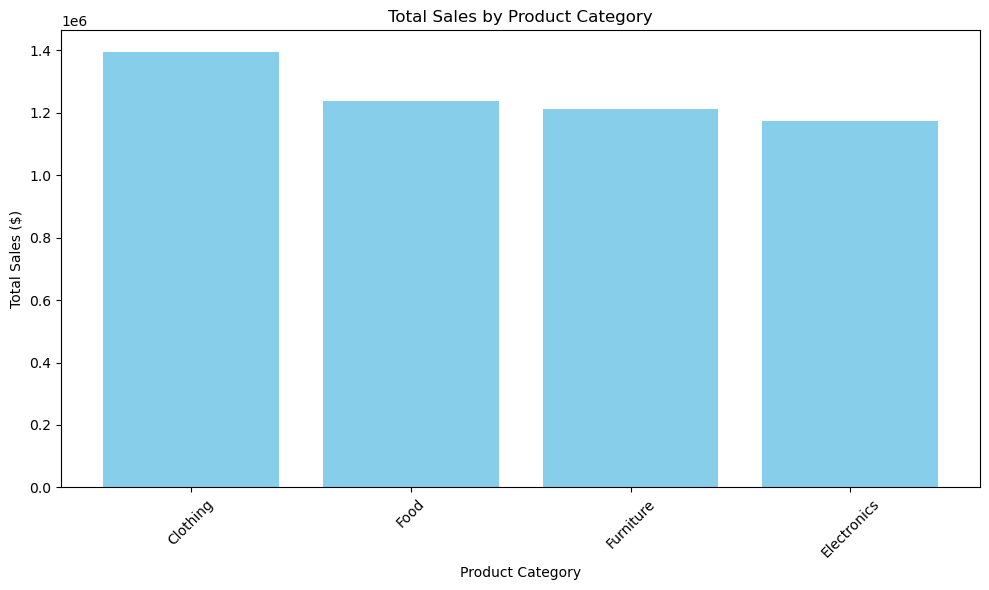

In [21]:
# Total Sales per Category

query = """
    SELECT pc.name AS category, SUM(o.sales_amount) AS total_sales
    FROM orders o
    JOIN products p ON o.product_id = p.product_id
    JOIN product_category pc ON p.category_id = pc.id
    GROUP BY pc.name
    ORDER BY total_sales DESC;
"""
category_sales_df = pd.read_sql(query, engine)
category_sales_df.head()

plt.figure(figsize=(10, 6))
plt.bar(category_sales_df['category'], category_sales_df['total_sales'], color='skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

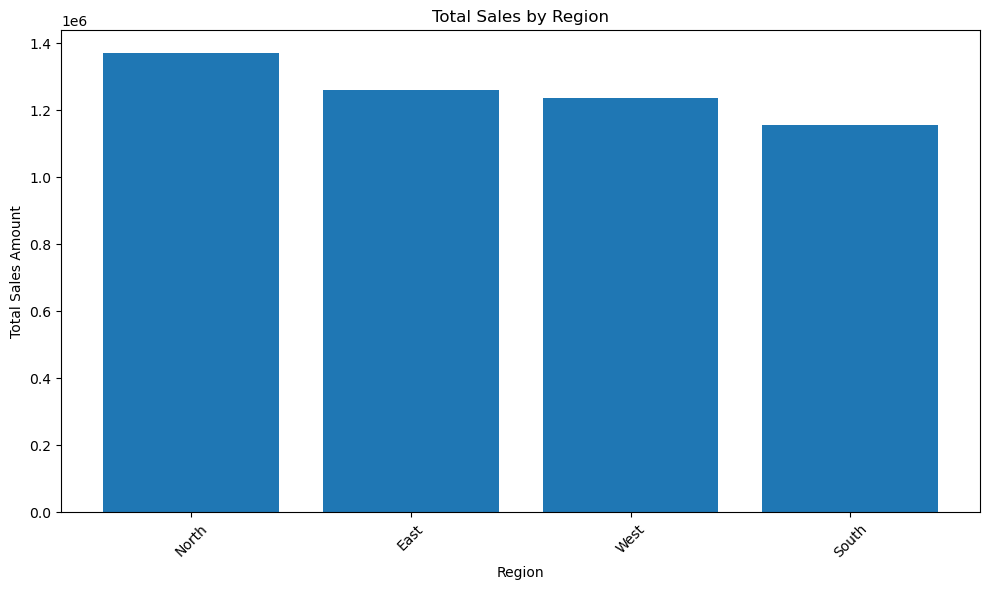

In [ ]:
# Regional Performance

orders_df = pd.read_csv("normalized_data/orders.csv")
regions_df = pd.read_csv("normalized_data/regions.csv")

merged_df = orders_df.merge(regions_df, left_on='region_id', right_on='region_id')

regional_sales = merged_df.groupby("region_name")["sales_amount"].sum().reset_index()

regional_sales = regional_sales.sort_values(by="sales_amount", ascending=False)

plt.figure(figsize=(10,6))
plt.bar(regional_sales["region_name"], regional_sales["sales_amount"])
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

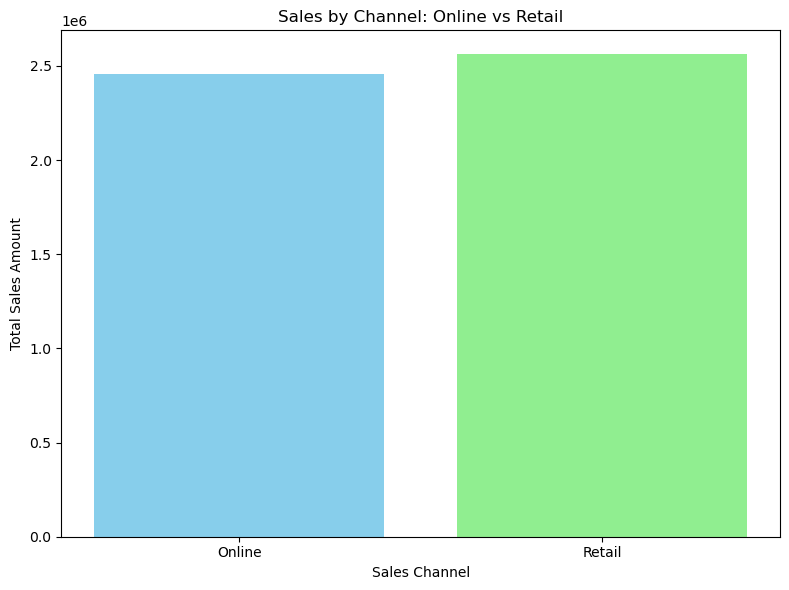

In [ ]:
# Sales Channel Analysis: Online vs Retail comparisons

df = pd.read_csv("data/sales_data.csv")

channel_sales = df.groupby("Sales_Channel")["Sales_Amount"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.bar(channel_sales["Sales_Channel"], channel_sales["Sales_Amount"], color=["skyblue", "lightgreen"])
plt.title("Sales by Channel: Online vs Retail")
plt.xlabel("Sales Channel")
plt.ylabel("Total Sales Amount")
plt.tight_layout()
plt.show()